<a href="https://colab.research.google.com/github/DAVIDnHANG/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment_Turnin2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-19 14:17:42--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-09-19 14:17:42 (633 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy
house = pd.read_csv("house-votes-84.data", header=None, names=['party','handicapped-infants','water-project',
                        'budget','physician-fee-freeze', 'el-salvador-aid',
                        'religious-groups','anti-satellite-ban',
                        'aid-to-contras','mx-missile','immigration',
                        'synfuels', 'education', 'right-to-sue','crime','duty-free',
                        'south-africa'] )
house=house.replace({'?':np.NaN, 'n':0, 'y':1})
# let split the data into reublican and democraft and y=1, n=0, ? = na.NaN
#house.head(5)
#seperate files
republican = house[house['party']== 'republican']
democrat = house[house['party'] == 'democrat']

#get the mean precentage of yes votes
MeanForDemo = democrat.mean()
List_of_dec_rounded_demoncrats=[round(elem,2) for elem in MeanForDemo]
MeanForRep = republican.mean()
List_of_dec_rounded_republican = [round(elem,2) for elem in MeanForRep]
List_of_dec_rounded_republican
democrat.columns



Index(['party', 'handicapped-infants', 'water-project', 'budget',
       'physician-fee-freeze', 'el-salvador-aid', 'religious-groups',
       'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration',
       'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free',
       'south-africa'],
      dtype='object')

In [0]:
def confidence_interval(data, confidence=.95):
  data=np.array(data)
  mean=np.nanmean(data)
  n=len(data)
  #stderr= stats.sem(data)
  stderr = np.std(data,ddof=1 / np.sqrt(n))
  margin_of_error = stderr * stats.t.ppf((1+confidence)/2.0, n-1, nan_policy='omit')
  print(margin_of_error)
  return(mean,mean-margin_of_error, mean+ margin_of_error)


In [0]:
def mean_confidence_interval(data, confidence=.95):
  a = 1.0 * np.array(data)
  n=len(a)
  m = np.nanmean(a) 
  se = scipy.stats.sem(a, nan_policy='omit')
  h=se*scipy.stats.t.ppf((1+confidence)/2., n-1)
  return m, m-h, m+h

This is Generate and numericallyu represents a confidence interval


In [0]:
mean_confidence_interval(democrat['physician-fee-freeze'])

(0.05405405405405406, 0.026335790101522146, 0.08177231800658596)

Graphically (with a plot) represent the confidence interval

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


NameError: ignored

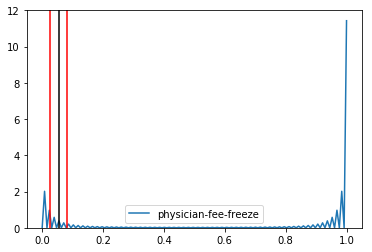

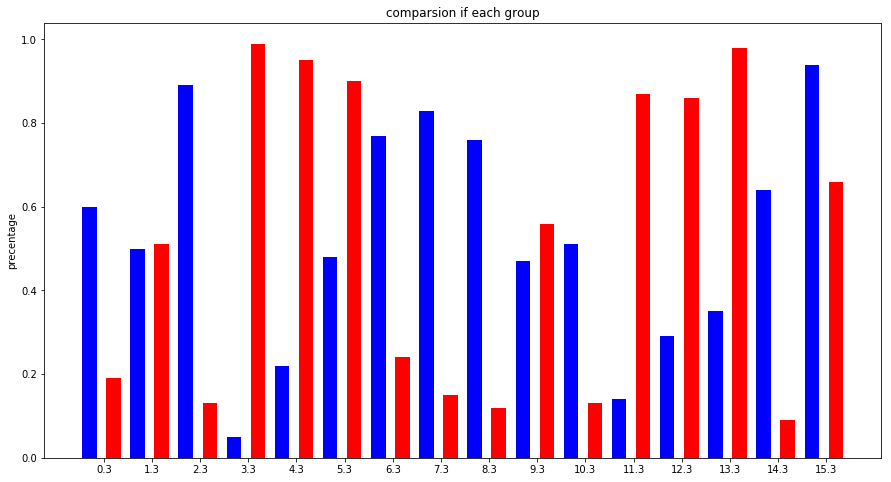

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(democrat['physician-fee-freeze'])
CI = mean_confidence_interval(democrat['physician-fee-freeze'])
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k')

ind = np.arange(16)
#plt
fig, ax = plt.subplots(figsize=(15,8))

#what will plotting?
plt.bar(ind, List_of_dec_rounded_demoncrats, width=.3, color='b')
Rep = ax.bar(ind+.5, List_of_dec_rounded_republican, width=.3, color='r')

#set labels title
ax.set_ylabel('precentage')
ax.set_title('comparsion if each group')

#this is the x ticks
ax.set_xticks(ind + .3)
ax.set_xticklabels(bills,rotation=50)
#
ax.legend(  (Demo[0],Rep[0]), ('Men', 'Women'))
plt.show()


redoing graph. leaveing above graph for to help me redo

In [0]:
import scipy as stddd
GetSTandardDev_democrat=[]
count = 0
while (count<16):
  #print(count)
  GetSTandardDev_democrat.append(np.std(democrat.iloc[:,[count]]))
  count=count+1
(GetSTandardDev_democrat)
STD_democrats = [0.489,0.500,0.226,0.211]


In [0]:
List_of_dec_rounded_demoncrats
(List_of_dec_rounded_demoncrats)
ListDem = np.array[.6,.5,.89,.22]
List_of_dec_rounded_republican
ListRep = np.array[0.19,0.51,0.13]


In [0]:
GetSTandardDev_Rep=[]
count = 0
while (count<16):
  #print(count)
  GetSTandardDev_Rep.append(np.std(republican.iloc[:,[count]]))
  count=count+1
GetSTandardDev_Rep
STD_rep = [0.500,0.341,0.110,0.215]

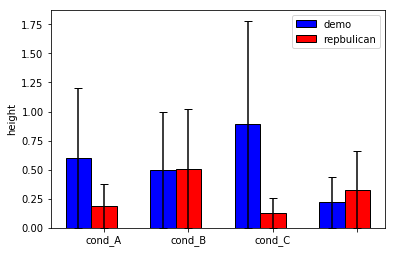

In [0]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = [.6,.5,.89,.22]
 
# Choose the height of the red bars
bars2 = [0.19,0.51,0.13, .33]
 
# Choose the height of the error bars (bars1)
yer1 = [.6,.5,.89,.22]
 
# Choose the height of the error bars (bars2)
yer2 = [0.19,0.51,0.13,0.33]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
#plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=16, label='demo')
plt.bar(r1, height= bars1, width = .3, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=4, label='demo')
# Create cyan bars
#plt.bar(r2,  bars2, width = barWidth, color = 'red', edgecolor = 'black', yerr=STD_rep, capsize=16, label='repbulican')
plt.bar(r2,  height = bars2, width = barWidth, color = 'red', edgecolor = 'black', yerr=yer2, capsize=4, label='repbulican') 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['handicapp', 'project', 'budget'])
plt.ylabel('height')
plt.legend()
 
# Show graphic
plt.show()


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)